# Analysing ESG report using Natural Language Processing


## Summary
Environment, Social and Corporate Governance (ESG) refers to the three central factors in measuring the sustainability and societal impact of an investment in a company or business.  These criteria help to better determin the future financial performance of companies (return and risk).

This analysis extracts text from a ESG report in PDF format from the internet, performs NLP on these information, summaries the key ESG initiatives with WordClouds, TDIDFs and discovers topics by building a Latent Dirichlet Allocation (LDA) model.

Given that ESG is a broad topic.  Different companies focus on different aspects of ESG depending on their business operations and culture.  One can potentially ingest more ESG reports from different companies across all sectors and industries to capture relevant ESG topics.  This to be attempted in another analysis.

## Install Dependencies

In [16]:
!pip install PyPDF2
!pip install gensim
!pip install nltk
!pip install WordCloud
!pip install pdfminer3
!pip install mlflow
!pip3 install spacy
!pip3 install pyLDAvis==2.1.2

  Using cached mlflow-1.30.0-py3-none-any.whl (17.0 MB)
  Using cached GitPython-3.1.30-py3-none-any.whl (184 kB)
  Using cached SQLAlchemy-1.4.46-cp37-cp37m-win_amd64.whl (1.6 MB)
  Using cached waitress-2.1.2-py3-none-any.whl (57 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached alembic-1.9.1-py3-none-any.whl (210 kB)
  Using cached Flask-2.2.2-py3-none-any.whl (101 kB)
  Using cached docker-6.0.1-py3-none-any.whl (147 kB)
  Using cached sqlparse-0.4.3-py3-none-any.whl (42 kB)
  Using cached databricks_cli-0.17.4-py3-none-any.whl
  Using cached prometheus_flask_exporter-0.21.0-py3-none-any.whl (18 kB)
  Using cached protobuf-4.21.12-cp37-cp37m-win_amd64.whl (526 kB)
  Using cached cloudpickle-2.2.0-py3-none-any.whl (25 kB)
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Using cached pywin32-305-cp37-cp37m-win_amd64.whl (12.2 MB)
  

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Anaconda3\\Lib\\site-packages\\win32\\_win32sysloader.pyd'
Consider using the `--user` option or check the permissions.



In [17]:
!pip freeze

anaconda-client @ file:///C:/ci/anaconda-client_1635342757050/work
anaconda-navigator==2.2.0
anyio @ file:///C:/ci/anyio_1644463705902/work/dist
appdirs==1.4.4
argon2-cffi @ file:///C:/ci/argon2-cffi_1613038019788/work
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functools-lru-cache @ file:///tmp/build/80754af9/backports.functools_lru_cache_1618170165463/work
backports.tempfile @ file:///home/linux1/recipes/ci/backports.tempfile_1610991236607/work
backports.weakref==1.0.post1
beautifulsoup4 @ file:///C:/ci/beautifulsoup4_1650292996413/work
bleach @ file:///opt/conda/conda-bld/bleach_1641577558959/work
blis==0.7.9
brotlipy==0.7.0
catalogue==2.0.8
certifi @ file:///C:/b/abs_85o_6fm0se/croot/certifi_1671487778835/work/certifi
cffi @ file:///C:/ci_310/cffi_1642682485096/work
chardet @ file:///C:/ci/chardet_1607706910910/work
charset-normalizer @ file:///tmp/build/80754af9/charset-normalizer_16300032

---
## Import Libraries

In [18]:
!pip install seaborn

In [19]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

import pandas as pd
import numpy as np

# pd.options.display.max_columns = 50
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 50)

plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':60})
plt.style.use('fivethirtyeight')

In [20]:
!pip install edge

In [21]:
import sys 
sys.path.append("\\COMPDrive\credit\20075503d\COMProfile\Desktop\src") 
from edge import *

ModuleNotFoundError: No module named 'edge'

In [28]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

# PDF text extraction
from pdfminer3.layout import LAParams, LTTextBox
from pdfminer3.pdfpage import PDFPage
from pdfminer3.pdfinterp import PDFResourceManager
from pdfminer3.pdfinterp import PDFPageInterpreter
from pdfminer3.converter import PDFPageAggregator
from pdfminer3.converter import TextConverter

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Others
import requests
import io
import string
import re
from pprint import pprint
from tqdm.notebook import tqdm
import io

C:\Anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


Create Folders

In [29]:
import sys
import os
import shutil
DATA_FOLDER = '\\COMPDrive\credit\20075503d\COMProfile\Desktop\data'
def CreateFolder(in_dir):
    print('创建'+in_dir+'文件夹')
    isExists=os.path.exists(in_dir)
    if not isExists: #不存在则创建
        print('创建'+in_dir+'文件夹成功')
    else:
        print(in_dir+'文件夹已存在')
CreateFolder(DATA_FOLDER)

创建\COMPDrive\credit75503d\COMProfile\Desktop\data文件夹
创建\COMPDrive\credit75503d\COMProfile\Desktop\data文件夹成功


<>:4: DeprecationWarning: invalid escape sequence \c
<>:4: DeprecationWarning: invalid escape sequence \c
<>:4: DeprecationWarning: invalid escape sequence \c
C:\Users\20075008d\AppData\Local\Temp\ipykernel_5152\150261787.py:4: DeprecationWarning: invalid escape sequence \c
  DATA_FOLDER = '\\COMPDrive\credit\20075503d\COMProfile\Desktop\data'


### Loading Language Model

In [30]:
!pip install scikit-learn

In [31]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm", disable=['ner'])

[nltk_data] Downloading package punkt to \\COMPDrive\credit\20075008d\
[nltk_data]     COMProfile\AppData\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to \\COMPDrive\credit\200750
[nltk_data]     08d\COMProfile\AppData\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Preparing Stop Words

In [32]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS.union(stop_words)

In [33]:
', '.join(stop_words)

"due, eg, therein, describe, their, thick, mightn't, nothing, became, that'll, isn, those, done, take, twelve, five, whither, t, shan't, a, any, hadn, will, wasn't, nor, whole, same, her, hundred, seeming, everything, thereby, the, he, which, having, our, up, none, becoming, already, ie, itself, aren't, beyond, toward, be, thin, needn't, about, you'll, this, d, off, own, ours, former, when, bill, most, an, m, for, meanwhile, sometime, ever, moreover, theirs, it, although, thru, forty, fill, give, somehow, fire, hereafter, first, otherwise, side, fifty, via, sometimes, throughout, across, again, less, anyhow, see, formerly, few, before, because, something, must, that, show, shan, mine, sincere, nowhere, only, mustn, everyone, mustn't, needn, his, wherever, since, further, myself, interest, weren't, becomes, latter, my, him, find, anything, on, one, beforehand, part, whereafter, now, after, rather, doesn't, just, once, and, move, detail, has, namely, hadn't, besides, in, were, might, dow

## Report Details

Enter required information about the report.  Report must be in PDF format and downloadable from a URL.

1. Company Name
2. Company Ticker Symbol
3. Year of the Report
4. URL of the Report

In [34]:
report_company = 'Abbott Laboratories'
report_ticker = 'ABT'
report_year = '2022'
report_url = 'https://dam.abbott.com/en-us/documents/pdfs/abbott-citizenship/Abbott-2021-Global-Sustainability-Report.pdf'

Additional information - ESG Score from Yahoo Finance

In [35]:
!pip install yfinance
import yfinance as yf

ticker_info = yf.Ticker(report_ticker)
esg_data = pd.DataFrame(ticker_info.sustainability)
esg_data.columns = [str(ticker_info.ticker)]

esg_data.loc[['totalEsg','socialScore','governanceScore','environmentScore',
              'esgPerformance','percentile','peerGroup','highestControversy'],:]

,ABT
2022-8,
totalEsg,24.98
socialScore,13.59
governanceScore,8.36
environmentScore,3.03
esgPerformance,AVG_PERF
percentile,44.01
peerGroup,Healthcare
highestControversy,3


## Text Extraction
Extract information from the PDF report.  This process may take some time.  Do be patient.

*You may skip to the last step of this section if you have previously extracted the contents and stored in a json file.*

In [36]:
def extract_pdf(file, verbose=False):
    
    if verbose:
        print('Processing {}'.format(file))

    try:
        resource_manager = PDFResourceManager()
        fake_file_handle = io.StringIO()
        codec = 'utf-8'
        laparams = LAParams()

        converter = TextConverter(resource_manager, fake_file_handle, codec=codec, laparams=laparams)
        page_interpreter = PDFPageInterpreter(resource_manager, converter)
        
        password = ""
        maxpages = 0
        caching = True
        pagenos = set()

        content = []

        for page in PDFPage.get_pages(file,
                                      pagenos, 
                                      maxpages=maxpages,
                                      password=password,
                                      caching=True,
                                      check_extractable=False):

            page_interpreter.process_page(page)

            content.append(fake_file_handle.getvalue())

            fake_file_handle.truncate(0)
            fake_file_handle.seek(0)        

        text = '##PAGE_BREAK##'.join(content)

        # close open handles
        converter.close()
        fake_file_handle.close()
        
        return text

    except Exception as e:
        print(e)

        # close open handles
        converter.close()
        fake_file_handle.close()

        return ""

In [37]:
def extract_content(url):
    """
    A simple user define function that, given a url, download PDF text content
    Parse PDF and return plain text version
    """
    headers={"User-Agent":"Mozilla/5.0"}

    try:
        # retrieve PDF binary stream
        r = requests.get(url, allow_redirects=True, headers=headers)
        
        # access pdf content
        text = extract_pdf(io.BytesIO(r.content))

        # return concatenated content
        return text

    except:
        return ""

In [38]:
report_content = extract_content(report_url)
report_content

"GLOBAL \nSUSTAINABILITY \nREPORT 2021\n\n\x0c##PAGE_BREAK##ABOUT\n\nACCESS AND AFFORDABILITY\n\nDATA\n\nWORKFORCE\n\nENVIRONMENT\n\nQUALITY AND SAFETY\n\nSUPPLY CHAIN\n\nGOVERNANCE\n\nESG APPENDIX\n\nWelcome\n\nFor Abbott, sustainability is about \noperating responsibly to deliver long-\nterm impact for people\xa0— shaping the \nfuture of healthcare to help more people \nlive better, healthier lives. \n\nIn this report, we detail our progress \nagainst the goals of our 2030 \nSustainability Plan. The data presented \nreflect 2021 performance unless \notherwise stated. \n\nWe have aligned our reporting \nwith the requirements of leading \nenvironmental, social and governance \n(ESG) ratings and sustainability indices, \nseeking stakeholder feedback to drive \ncontinuous improvement.\n\nON THE COVER\n(L to R) Meghan Thompson, Senior Scientist, \nBiowearables; Erika Vargas Monestel, Diabetes \nCare Professional Development Program, and \nFormer College Intern; and Junli Ou, Senior \nMana

Storing all information in a json file

In [39]:
!pip install simplejson
import json

In [40]:
report = {'company':report_company, 'year':report_year, 'ticker':report_ticker, 
          'url':report_url, 'content':report_content}
report

{'company': 'Abbott Laboratories',
 'year': '2022',
 'ticker': 'ABT',
 'url': 'https://dam.abbott.com/en-us/documents/pdfs/abbott-citizenship/Abbott-2021-Global-Sustainability-Report.pdf',
 'content': "GLOBAL \nSUSTAINABILITY \nREPORT 2021\n\n\x0c##PAGE_BREAK##ABOUT\n\nACCESS AND AFFORDABILITY\n\nDATA\n\nWORKFORCE\n\nENVIRONMENT\n\nQUALITY AND SAFETY\n\nSUPPLY CHAIN\n\nGOVERNANCE\n\nESG APPENDIX\n\nWelcome\n\nFor Abbott, sustainability is about \noperating responsibly to deliver long-\nterm impact for people\xa0— shaping the \nfuture of healthcare to help more people \nlive better, healthier lives. \n\nIn this report, we detail our progress \nagainst the goals of our 2030 \nSustainability Plan. The data presented \nreflect 2021 performance unless \notherwise stated. \n\nWe have aligned our reporting \nwith the requirements of leading \nenvironmental, social and governance \n(ESG) ratings and sustainability indices, \nseeking stakeholder feedback to drive \ncontinuous improvement.\n\nON

Reloading the json file when required

In [41]:
DATA_FOLDER

'\\COMPDrive\\credit\x8075503d\\COMProfile\\Desktop\\data'

In [42]:
with open('ABT.json', "w") as outfile:  
    json.dump(report, outfile)

In [43]:
with open('ABT.json') as inputfile:
     report = json.load(inputfile)

---

## Natural Language Processing

### Extracting content by pages and sentences

1. Only properly structured sentences are extracted.  Sentences that start with a Capital Letter and ends with a period.  Sentences that are less than 10 words or more than 50 words are ignored.  
2. Pages with less than 500 words are excluded from extraction.  Would like to focus on pages with mostly text content.  This should exclude pages like cover and last page.  It should also exclude pages that are more graphical with short notes and comments.

In [44]:
def remove_non_ascii(text):
    printable = set(string.printable)
    return ''.join(filter(lambda x: x in printable, text))

def not_header(line):
    # as we're consolidating broken lines into paragraphs, we want to make sure not to include headers
    return not line.isupper()

def extract_sentences(nlp, text):
    """
    Extracting ESG statements from raw text by removing junk, URLs, etc.
    We group consecutive lines into paragraphs and use spacy to parse sentences.
    """
    MIN_WORDS_PER_PAGE = 500
    
    pages = text.split('##PAGE_BREAK##')
#     print('Number of Pages: {}'.format(len(pages)))

    lines = []
    for page in pages:
        
        # remove non ASCII characters
        text = remove_non_ascii(page)
        
        if len(text.split(' ')) < MIN_WORDS_PER_PAGE:
#             print('Skipped Page: {}'.format(len(text.split(' '))))
            continue
        
        prev = ""
        for line in text.split('\n\n'):
            # aggregate consecutive lines where text may be broken down
            # only if next line starts with a space or previous does not end with dot.
            if(line.startswith(' ') or not prev.endswith('.')):
                prev = prev + ' ' + line
            else:
                # new paragraph
                lines.append(prev)
                prev = line

        # don't forget left-over paragraph
        lines.append(prev)
        lines.append('##SAME_PAGE##')
        
    lines = '  '.join(lines).split('##SAME_PAGE##')
    
    # clean paragraphs from extra space, unwanted characters, urls, etc.
    # best effort clean up, consider a more versatile cleaner
    
    sentences = []
    pages_content = []

    for line in lines[:-1]:
        # removing header number
        line = re.sub(r'^\s?\d+(.*)$', r'\1', line)
        # removing trailing spaces
        line = line.strip()
        # words may be split between lines, ensure we link them back together
        line = re.sub(r'\s?-\s?', '-', line)
        # remove space prior to punctuation
        line = re.sub(r'\s?([,:;\.])', r'\1', line)
        # ESG contains a lot of figures that are not relevant to grammatical structure
        line = re.sub(r'\d{5,}', r' ', line)
        # remove emails
        line = re.sub(r'\S*@\S*\s?', '', line)
        # remove mentions of URLs
        line = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', r' ', line)
        # remove multiple spaces
        line = re.sub(r'\s+', ' ', line)
        # join next line with space
        line = re.sub(r' \n', ' ', line)
        line = re.sub(r'.\n', '. ', line)
        line = re.sub(r'\x0c', ' ', line)
        
        pages_content.append(str(line).strip())

        # split paragraphs into well defined sentences using spacy
        for part in list(nlp(line).sents):
            sentences.append(str(part).strip())

#           sentences += nltk.sent_tokenize(line)
            
    # Only interested in full sentences and sentences with 10 to 100 words.
    sentences = [s for s in sentences if re.match('^[A-Z][^?!.]*[?.!]$', s) is not None]
    sentences = [s.replace('\n', ' ') for s in sentences]
    sentences = [s for s in sentences if (len(s.split(' ')) > 10) & (len(s.split(' ')) < 100)]

    return pages_content, sentences

In [45]:
report_pages, report_sentences = extract_sentences(nlp, report['content'])

On best effort basis, excluding header and footer contents that are not relevant.

In [46]:
headers = ['Contents Our Approach to ESG Solutions for Impact How We Do Business Appendices', 'Citi 2019 ESG Report']

for header in headers:
    report_pages = [p.replace(header, "").strip() for p in report_pages]
    report_sentences = [p.replace(header, "").strip() for p in report_sentences]    

### Tokenization, Bigrams and Lemmatization

In [47]:
def run_NLP(content):

    def sent_to_words(sentences):
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

    # Define functions for stopwords, bigrams, trigrams and lemmatization
    def remove_stopwords(texts):
        return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

    def make_bigrams(texts):
        return [bigram_mod[doc] for doc in texts]

    def make_trigrams(texts):
        return [trigram_mod[bigram_mod[doc]] for doc in texts]

    def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        """https://spacy.io/api/annotation"""
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent)) 
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        return texts_out

    data_words = list(sent_to_words(content))

    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    # Remove Stop Words
    data_words_nostops = remove_stopwords(data_words)

    # Form Bigrams
    data_words_bigrams = make_bigrams(data_words_nostops)

    # Do lemmatization keeping only noun, adj, vb, adv
    data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    
    return data_lemmatized

Using full text content in a page rather than full text content in a sentence here.  A page defined as a document as per TFIDF calculation.  

In [48]:
data_lemmatized = run_NLP(report_pages)

In [49]:
report_sentences_lemma = [' '.join(w) for w in data_lemmatized]

In [50]:
import random
report_sentences_lemma[random.randint(0, len(report_sentences_lemma))]

'access workforce_environment quality safety supply_chain appendix protect people product brand ensure authenticity product critical maintain product maintain strict protocol eliminate counterfeit product protect securityrisk bus business support team bst develop product identification playbook authorize packaging manufacturing location typical shipping route help align internal effort external organization foster awareness boost identification fraudulent product protect product authenticity continuously innovate mitigate counterfeit illegal diversion risk drive global security legal trademark regulatory public affair business unit team enforcement program remove thousand fraudulent online marketplace listing divert product month global security team use state art analytic identify eliminate unauthorized sale remove marketplace app website social medium site sell counterfeit divert outdate steal product individual product listing safeguard intellectual property follow step safeguard in

Relevant sentences are now well defined for ESG corpus.

### Word Cloud - Corpus Wide Term Frequencies

In [51]:
# context specific keywords not to include in topic modelling
fsi_stop_words = [
  'plc', 'group', 'target',
  'track', 'capital', 'holding',
  'report', 'annualreport',
  'esg', 'bank', 'report',
  'annualreport', 'long', 'make'
]

fsi_stop_words.append(report_company)
fsi_stop_words.append('apple')

# our list contains all english stop words + companies names + specific keywords
stop_words = stop_words.union(fsi_stop_words)

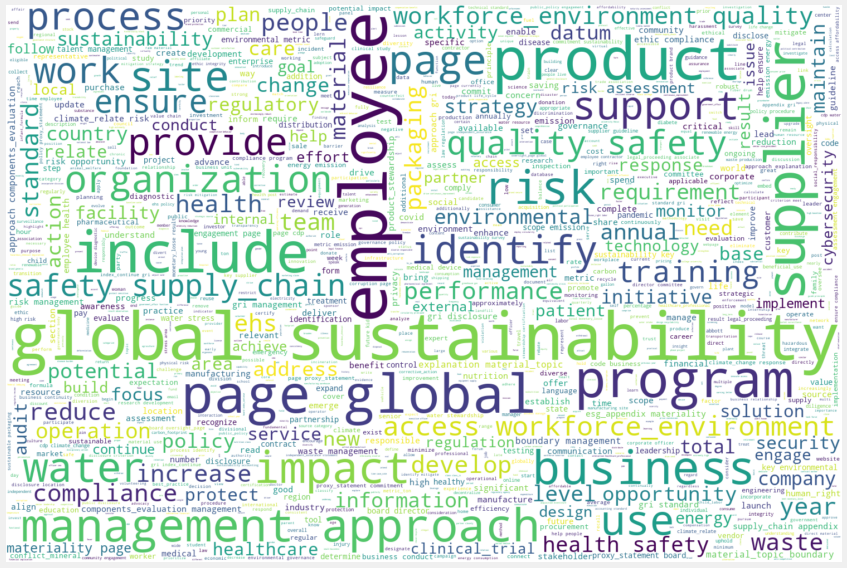

In [52]:
from wordcloud import WordCloud

# aggregate all 7200 records into one large string to run wordcloud on term frequency
large_string = ' '.join(report_sentences_lemma)

# use 3rd party lib to compute term freq., apply stop words
word_cloud = WordCloud(
    background_color="white",
    max_words=5000, 
    width=1500, 
    height=1000, 
    stopwords=stop_words, 
    contour_width=3, 
    contour_color='steelblue'
)

# display our wordcloud across all records
plt.figure(figsize=(16,16))
word_cloud.generate(large_string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### TFIDF - Unigram and Bigram Analysis

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Run bi-gram TF-IDF frequencies
bigram_tf_idf_vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2), min_df=1, use_idf=True)

In [54]:
report_sentences_lemma

['access workforce_environment quality safety supply_chain message approach year business endure s long understand key sustain enterprise willingness evolve change environment adapt way make well able achieve fundamental purpose help people live healthy fuller life amply demonstrate ability history strategically reshape world lead health technology company broad portfolio global reach let help people year challenge lifetime highlight critical nature work significant positive impact patient community operate know want sustain impact change world rely playbook use incorporate input internal external stakeholder develop year plan identify area need focus order grow sustainably central plan idea good pursue fundamental mission company bring life change technology product people place need build affordability product increase access break barrier prevent people get care need support core purpose set ambitious goal key area strengthen foundation future include build workforce tomorrow respon

In [55]:
bigram_tf_idf = bigram_tf_idf_vectorizer.fit_transform(report_sentences_lemma)

In [56]:
# Extract bi-grams names
words = bigram_tf_idf_vectorizer.get_feature_names()

# extract our top 10 ngrams
total_counts = np.zeros(len(words))
for t in bigram_tf_idf:
    total_counts += t.toarray()[0]

count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

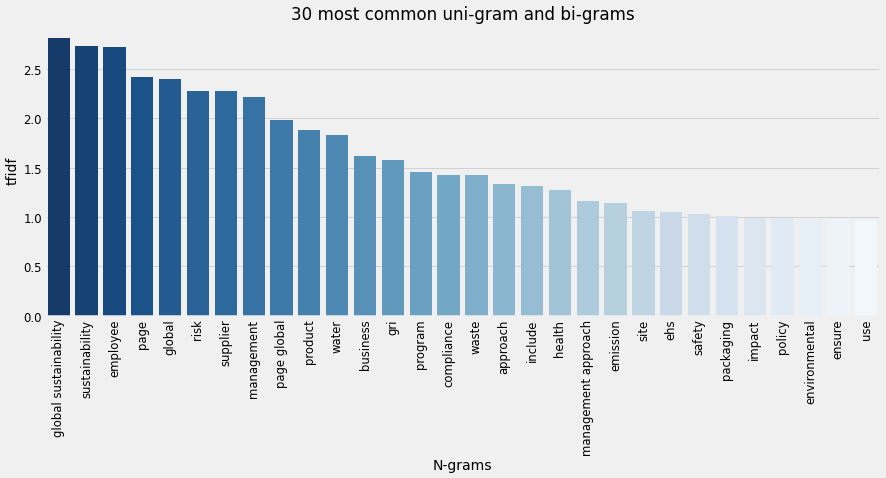

In [57]:
# Plot top 10 ngrams
plt.figure(figsize=(16, 6))
plt.subplot(title='30 most common uni-gram and bi-grams')
sns.barplot(x=x_pos,y=counts,palette='Blues_r')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('N-grams')
plt.ylabel('tfidf')
plt.show()

---


## Topic Modeling and Latent Dirichlet Allocation (LDA)

Evaluaton Metrics
1. **Perplexity**: Captures how surprised a model is of new data it has not seen before, and is measured as the normalized log-likelihood of a held-out test set.  Lower the better.
2. **Coherence Score**: Measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic.  Higher the better.

In the analysis, the model with the highest coherence score is selected as the optimal model.

In [58]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [59]:
!pip install ipywidgets

In [60]:
!pip install tqdm

In [61]:
results = []
optimal_score = 0
optimal_model = None

for num_of_topics in tqdm(range(2,15,1)):
    
    result = {}
    
    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=num_of_topics, 
                                                random_state=42,
                                                update_every=1,
                                                chunksize=5,
                                                passes=20,
                                                alpha='auto',
                                                per_word_topics=True) 

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    if optimal_score < coherence_model_lda.get_coherence():
        optimal_score = coherence_model_lda.get_coherence()
        optimal_model = lda_model

    result['num_of_topics'] = num_of_topics
    result['perplexity'] = lda_model.log_perplexity(corpus)
    result['coherence_score'] = coherence_model_lda.get_coherence()
    
    results.append(result)
    
results = pd.DataFrame(results)  
results.set_index('num_of_topics', inplace=True) 

  0%|          | 0/13 [00:00<?, ?it/s]

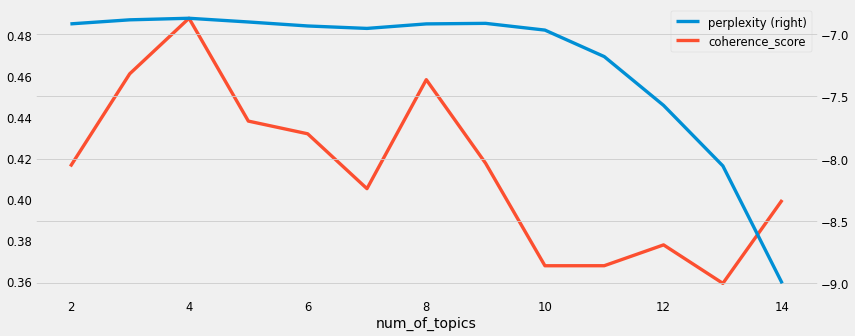

In [63]:
results.plot(secondary_y='perplexity')
plt.show()

In [64]:
results

,perplexity,coherence_score
num_of_topics,,
2,-6.921120,0.415928
3,-6.888533,0.460991
4,-6.876046,0.488020
5,-6.905796,0.437983
6,-6.937795,0.431808
7,-6.957395,0.405108
8,-6.921195,0.458142
9,-6.916861,0.417464
10,-6.970908,0.367597


In [65]:
# Compute Perplexity
print('\nPerplexity of the Optimal Model: ', optimal_model.log_perplexity(corpus))  

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=optimal_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score of the Optimal Model: ', coherence_lda)


Perplexity of the Optimal Model:  -6.876045652111603

Coherence Score of the Optimal Model:  0.48802032135352647


---

## Visualize the topics

In [66]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.000741  0.152413       1        1  39.260243
0      0.057937  0.104320       2        1  35.755564
2     -0.251892 -0.097612       3        1  13.668439
1      0.193214 -0.159122       4        1  11.315754, topic_info=                Term        Freq       Total Category  logprob  loglift
117             page  235.000000  235.000000  Default  30.0000  30.0000
317   sustainability  214.000000  214.000000  Default  29.0000  29.0000
70            global  230.000000  230.000000  Default  28.0000  28.0000
147           report  215.000000  215.000000  Default  27.0000  27.0000
269       management  225.000000  225.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
308         solution    9.630449   20.644694   Topic4  -5.2832   1.4164
2186           false    7.765490   12.408019   Topic4  -5.4984   1.7103
132          product   20.002658  166.901853   Topic4  -4.5523   0.0574
24            change   10.542141   43.276020   Topic4  -5.1928   0.7668
75            health    9.790193   81.992756   Topic4  -5.2668   0.0537

[250 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2         1  0.238525      access
2         2  0.426834      access
2         3  0.062770      access
2         4  0.276187      access
439       4  0.893562  accessible
...     ...       ...         ...
186       2  0.654292        work
186       3  0.021106        work
186       4  0.063319        work
190       1  0.592399        year
190       4  0.394933        year

[318 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [67]:
# Print the Keyword in the 10 topics
pprint(optimal_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.030*"employee" + 0.015*"program" + 0.014*"compliance" + 0.014*"safety" + '
  '0.014*"product" + 0.012*"health" + 0.011*"include" + 0.011*"quality" + '
  '0.010*"business" + 0.008*"global"'),
 (1,
  '0.021*"clinical_trial" + 0.015*"study" + 0.012*"access" + 0.011*"product" + '
  '0.010*"clinical" + 0.010*"medical" + 0.010*"patient" + 0.010*"price" + '
  '0.010*"healthcare" + 0.008*"people"'),
 (2,
  '0.087*"page" + 0.079*"sustainability" + 0.074*"global" + 0.066*"report" + '
  '0.046*"management" + 0.037*"gri" + 0.034*"approach" + 0.014*"environmental" '
  '+ 0.012*"proxy_statement" + 0.011*"water"'),
 (3,
  '0.032*"risk" + 0.014*"management" + 0.013*"supplier" + 0.013*"business" + '
  '0.013*"water" + 0.011*"impact" + 0.010*"opportunity" + 0.010*"product" + '
  '0.009*"identify" + 0.009*"use"')]


---

## Distinguishing the different ESG topics

In [68]:
topic_names = {0: 'support community', 1: 'value employees'}

#     'value employees',
#     'ethical investments',
#     'strong governance',
#     'focus customer',    
#     'green energy',
#     'support community',
#     'code of conduct',
#     'sustainable finance',
#     'company transformation',


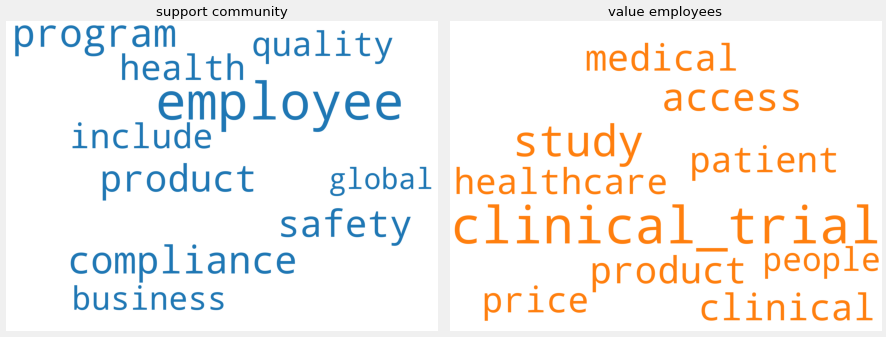

In [69]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=50,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(topic_names[i], fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Closing Notes
1. This is only a simple analysis that studies the ESG topics in only one ESG report.  This study can be extended to more reports issued by the many companies across different sectors and industries.
2. We can expect the number of topics to increase when more ESG reports are included in the study.
3. Once relevant ESG topics are identified, then we can potentially calculate ESG scores by topics for all companies.  Then we can assess and see whether such ESG score derived through NLP process correlates with the score given by rating agencies downloaded from yahoo finance.